1) Qual foi o jogo mais vendido no mundo em 2010?

In [14]:
import pandas as pd

data = pd.read_csv('vgsales.csv')

jogos_2010 = data[['Rank', 'Name', 'Year']].query('Year == 2010')

mais_vendido_2010 = jogos_2010.sort_values(by='Rank')['Name'].values[0]

print(f'Jogo mais vendido de 2010:', mais_vendido_2010.upper())

Jogo mais vendido de 2010: KINECT ADVENTURES!


2) Qual foi o gênero mais vendido na américa do norte em 2005?

In [15]:
jogos_2005 = data[['Year', 'NA_Sales', 'Genre']].query('Year == 2005')
generos_mais_vendidos_america_norte_2005 = jogos_2005[['NA_Sales', 'Genre']].groupby('Genre')

mais_vendido_2005 = generos_mais_vendidos_america_norte_2005.sum().sort_values(by='NA_Sales', ascending=False)

genero_mais_vendido = mais_vendido_2005.index[0]
genero_maior_faturamento = mais_vendido_2005.values[0][0]

print(f'Gênero de Jogos Mais Vendido em 2005 na América do Norte: {genero_mais_vendido.upper()} \nTotal Faturado: {genero_maior_faturamento} milhões de dólares')

Gênero de Jogos Mais Vendido em 2005 na América do Norte: ACTION 
Total Faturado: 49.62 milhões de dólares


3) Qual foi a empresa que mais vendeu de 2005 até 2016?

In [16]:

vendas_empresas = data[['Publisher', 'Global_Sales', 'Year']]
vendas_2005_a_2006 = vendas_empresas.query('Year >= 2005 & Year <= 2016')

empresas = vendas_2005_a_2006[['Publisher', 'Global_Sales']].groupby('Publisher')

empresa_maior_venda = empresas.sum().sort_values(by='Global_Sales', ascending=False).index[0]
maior_faturamento = empresas.sum().sort_values(by='Global_Sales', ascending=False).values[0][0]

print(f'A empresa que mais faturou em vendas entre os anos de 2005 a 2016 foi a {empresa_maior_venda.upper()} \ncom um total de {maior_faturamento} milhões de dólares.')

A empresa que mais faturou em vendas entre os anos de 2005 a 2016 foi a NINTENDO 
com um total de 958.43 milhões de dólares.


4) Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.

In [17]:
vendas_esportes_2008 = data[['Name', 'Genre', 'Year', 'Global_Sales']].query('Genre == "Sports" and Year == 2008')

valor_menos_vendidos_esportes_2008 = vendas_esportes_2008['Global_Sales'].min()
menos_vendidos_2008 = vendas_esportes_2008[['Name', 'Global_Sales']].query(f'Global_Sales == {valor_menos_vendidos_esportes_2008}').values[:]
print(f'O jogo de espeorte menos vendido de 2008 foi \n{menos_vendidos_2008}')

O jogo de espeorte menos vendido de 2008 foi 
[['Winning Post 7 Maximum 2008' 0.01]
 ['Fab 5 Soccer' 0.01]
 ['Major Dream: Major Wii Nagero! Gyroball!!' 0.01]
 ['Winning Post 7 Maximum 2008' 0.01]
 ['Family Jockey' 0.01]
 ['G1 Jockey 4 2008' 0.01]
 ['Summer Athletics' 0.01]]


5) Mostre um gráfico com o total de vendas por ano.

<Axes: xlabel='Year'>

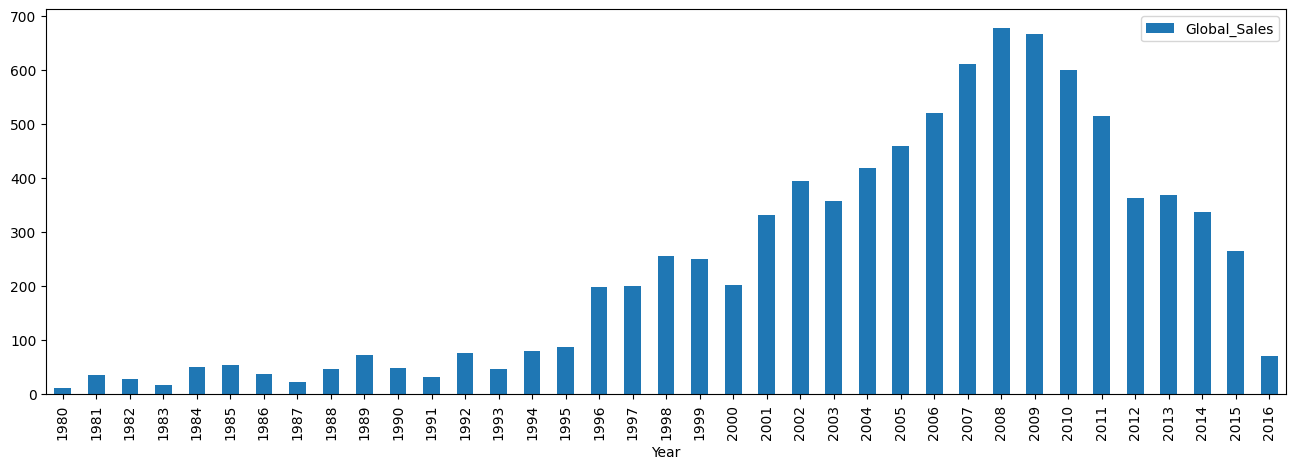

In [18]:
vendas_por_ano = data[['Year', 'Global_Sales']].groupby('Year').sum()

vendas_por_ano.plot.bar(figsize=(16,5))






6) Qual foi o ano com mais lançamentos de jogos?

In [19]:
lancamentos_ano = data[['Year', 'Name']].groupby('Year')

ano_mais_lancamentos = lancamentos_ano.count().sort_values(by='Name', ascending=False).index[0]
quantidade_ano_mais_lancamentos = lancamentos_ano.count().sort_values(by='Name', ascending=False).values[0][0]

print(f'Ano com mais lançamentos: {ano_mais_lancamentos} \nTotal de Lançamentos: {quantidade_ano_mais_lancamentos}')

Ano com mais lançamentos: 2009 
Total de Lançamentos: 1433


7) Qual a plataforma que menos lançou jogos?

In [20]:
empresas_lancamentos = data[['Platform', 'Name']].groupby('Platform')

empresas_menor_quantidade_lancamentos = empresas_lancamentos.count().sort_values(by='Name').head(2).index[0:2].values[0:2]
quantidade_empresas_menor_lancamento = empresas_lancamentos.count().sort_values(by='Name').head(2).values[0][0]

print(f'Empresas que menos lançaram jogos:{empresas_menor_quantidade_lancamentos} \ncom um total de {quantidade_empresas_menor_lancamento} lançamento cada.' )

Empresas que menos lançaram jogos:['GG' 'PCFX'] 
com um total de 1 lançamento cada.


8) Qual plataforma que mais gerou lucros com jogos do gênero Action desde
2009?

In [21]:
vendas_plataformas_desde_2009 = data[['Platform', 'Year', 'Global_Sales', 'Genre']].query('Year >= 2009 and Genre == "Action"')

vendas_totais_platformas_desde_2009 = vendas_plataformas_desde_2009[['Platform', 'Global_Sales']].groupby('Platform').sum().sort_values(by='Global_Sales', ascending=False)

plataforma_maior_faturamento_desde_2009 = vendas_totais_platformas_desde_2009.index[0]
maior_faturamento_desde_2009 = vendas_totais_platformas_desde_2009.values[0][0]

print(f'Plataforma que mais faturou com gênero de ação desde 2009: {plataforma_maior_faturamento_desde_2009}')
print(f'Total Faturado: {maior_faturamento_desde_2009} milhoões de dólares')


      

Plataforma que mais faturou com gênero de ação desde 2009: PS3
Total Faturado: 247.84 milhoões de dólares


9) Qual empresa teve o maior lucro (sob o teto de 0.35 milhões) de 1980 até
1995, excluindo-se a plataforma SNES.

In [22]:
vendas_1980_a_1995 = data[['Publisher', 'Global_Sales', 'Year', 'Platform']].query('Year >= 1980 and Year <= 1995 and Platform != "SNES"')

empresas_maior_venda_sob_teto = vendas_1980_a_1995[['Publisher', 'Global_Sales']].groupby('Publisher').sum().query('Global_Sales < 0.35')

nome_empresa_maior_venda_sob_teto = empresas_maior_venda_sob_teto.sort_values(by='Global_Sales', ascending=False).index[0]
valor_empresa_maior_venda_sob_teto = empresas_maior_venda_sob_teto.sort_values(by='Global_Sales', ascending=False).values[0][0]

print(f'Empresa: {nome_empresa_maior_venda_sob_teto.upper()}.')
print(f'Total Faturado: {valor_empresa_maior_venda_sob_teto} milhões de dólares. ')

Empresa: ITT FAMILY GAMES.
Total Faturado: 0.34 milhões de dólares. 


10)A empresa que mais lucrou no Japão em 2003 é a mesma que mais lucrou
na europa nesse mesmo ano?

In [23]:
faturamento_japao_2003 = data[['Publisher', 'JP_Sales', 'Year']].query('Year == 2003')
faturamento_total_japao_2003 = faturamento_japao_2003[['Publisher', 'JP_Sales']].groupby('Publisher').sum().sort_values(by='JP_Sales', ascending=False)

empresa_maior_faturamento_japao = faturamento_total_japao_2003.index[0]
maior_faturamento_japao_2003 = faturamento_total_japao_2003.values[0][0]

faturamento_europa_2003 = data[['Publisher', 'EU_Sales', 'Year']].query('Year == 2003')
faturamento_total_europa_2003 = faturamento_europa_2003[['Publisher', 'EU_Sales']].groupby('Publisher').sum().sort_values(by='EU_Sales', ascending=False)

empresa_maior_faturamento_europa = faturamento_total_europa_2003.index[0]
maior_faturamento_europa_2003 = faturamento_total_europa_2003.values[0][0]

if empresa_maior_faturamento_japao == empresa_maior_faturamento_europa:
    print(f'A mesma empresa foi líder no faturamento na Europa e Japão, sendo ela {empresa_maior_faturamento_japao.upper()}.')
else:
    print('--'*35)
    print(f'A empresa que mais faturou em 2003 no Japão foi a {empresa_maior_faturamento_japao.upper()} \ncom um total de vendas de {maior_faturamento_japao_2003} milhões de dólares.')
    print('--'*35)
    print(f'A empresa que mais faturou em 2003 na Europa foi a {empresa_maior_faturamento_europa} \ncom um total de vendas de {maior_faturamento_europa_2003} milhões de dólares.')
    print('--'*35)


----------------------------------------------------------------------
A empresa que mais faturou em 2003 no Japão foi a NINTENDO 
com um total de vendas de 9.85 milhões de dólares.
----------------------------------------------------------------------
A empresa que mais faturou em 2003 na Europa foi a Electronic Arts 
com um total de vendas de 21.11 milhões de dólares.
----------------------------------------------------------------------


11)Qual o percentual relacionado às vendas globais de jogos de Wii
(excluindo-se América do norte, japão e europa) de 2006 até 2010?

In [24]:
outras_vendas_2006_a_2010 = data[['Platform', 'Other_Sales', 'Year']].query('Year >= 2006 and Year <= 2010')

numero_total_outras_vendas = outras_vendas_2006_a_2010['Other_Sales'].sum()

vendas_wii = outras_vendas_2006_a_2010.query('Platform == "Wii" ')

numero_total_outras_vendas_wii = vendas_wii['Other_Sales'].sum()

porcentagem_vendas_wii = (numero_total_outras_vendas_wii / numero_total_outras_vendas) * 100

print(outras_vendas_2006_a_2010[['Platform', 'Other_Sales']].groupby('Platform').sum())

print(f'O Nintendo Wii foi resposnável por {porcentagem_vendas_wii:.2f}% das Outras Vendas entre os anos de 2006 a 2010')



          Other_Sales
Platform             
DC               0.00
DS              45.19
GBA              0.14
GC               0.26
PC               8.38
PS2             68.64
PS3             71.38
PSP             32.80
Wii             70.82
X360            51.19
XB               0.35
O Nintendo Wii foi resposnável por 20.28% das Outras Vendas entre os anos de 2006 a 2010


12)Mostre um gráfico de linhas com as vendas em diferentes plataformas ao
longo dos anos.

Axes(0.125,0.11;0.775x0.77)


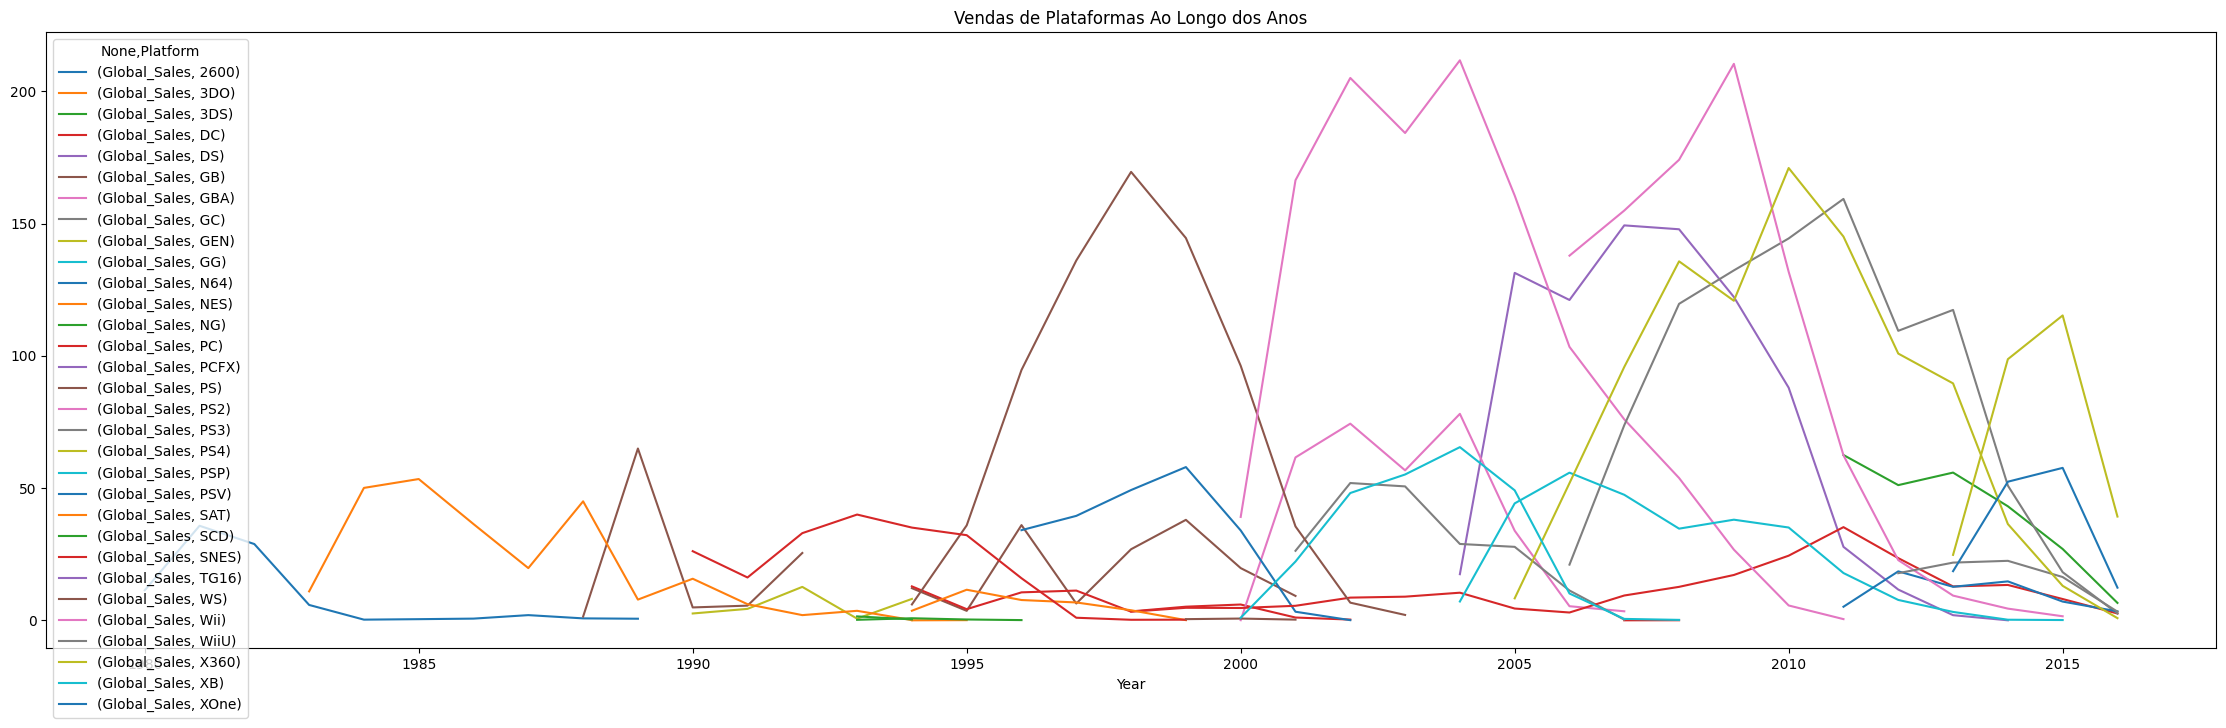

In [25]:
mais_vendidos_por_plataforma_ano = data[['Platform', 'Year', 'Global_Sales']].groupby(['Year', 'Platform']).sum()

print(mais_vendidos_por_plataforma_ano.unstack().plot(figsize=(28,8), title='Vendas de Plataformas Ao Longo dos Anos'))

13)Mostre um gráfico de pizza com o percentual de vendas dos diferentes
gêneros de jogos.

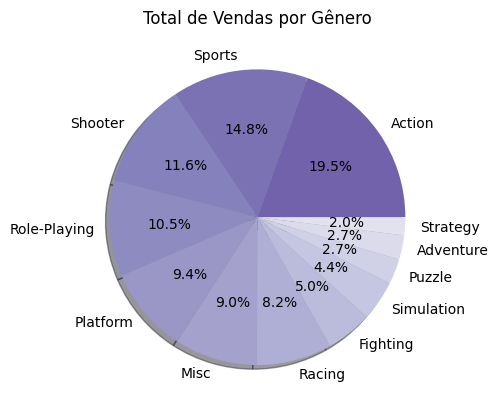

In [26]:
import matplotlib.pyplot as plt
import numpy as np

total_vendas_genero = data[['Genre', 'Global_Sales']].groupby('Genre').sum().sort_values(by='Global_Sales', ascending=False)

rotulos = total_vendas_genero.index[:].tolist()
porcentagens = total_vendas_genero['Global_Sales'].tolist()
cores = plt.get_cmap('Purples')(np.linspace(0.7, 0.2, len(rotulos)))


plt.pie(porcentagens, labels=rotulos, shadow=True, autopct='%1.1f%%',colors=cores)
plt.title('Total de Vendas por Gênero')
plt.show()



